In [1]:
import numpy as np

# For IHDP
ihdp_data = np.load("Dataset/ihdp_npci_1-100.train.npz")
print("IHDP keys:", ihdp_data.files)

# For Jobs
jobs_data = np.load("Dataset/jobs_DW_bin.new.10.train.npz")
print("Jobs keys:", jobs_data.files)

IHDP keys: ['ate', 'mu1', 'mu0', 'yadd', 'yf', 'ycf', 't', 'x', 'ymul']
Jobs keys: ['ate', 'e', 'I', 'yadd', 'yf', 't', 'x', 'ymul']



IHDP keys: ['ate', 'mu1', 'mu0', 'yadd', 'yf', 'ycf', 't', 'x', 'ymul']
IHDP shapes — x: (672, 25, 100), t: (672, 100), yf: (672, 100)
IHDP treatment values: [0. 1.]
IHDP outcome (yf) stats:
 - dtype: float64
 - min: -2.55323749722667
 - max: 299.21654905067
 - unique values (if few): Too many to display


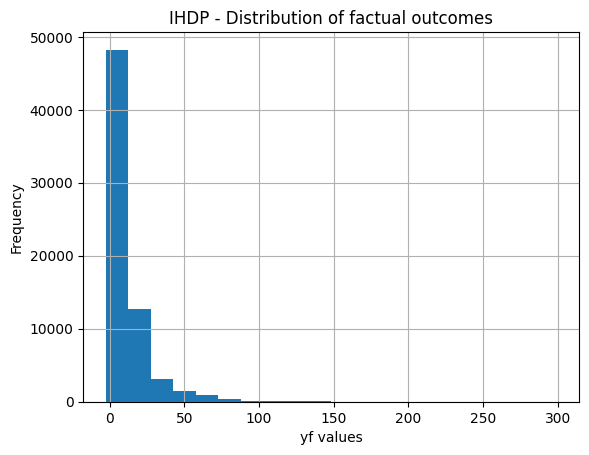


Jobs keys: ['ate', 'e', 'I', 'yadd', 'yf', 't', 'x', 'ymul']
Jobs shapes — x: (2570, 17, 10), t: (2570, 10), yf: (2570, 10)
Jobs treatment values: [0. 1.]
Jobs outcome (yf) stats:
 - dtype: float64
 - min: 0.0
 - max: 1.0
 - unique values (if few): [0. 1.]


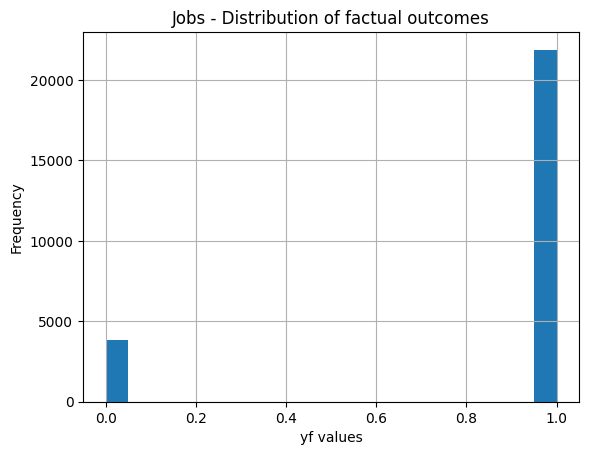

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def inspect_dataset(path, name="Dataset"):
    data = np.load(path)
    print(f"\n{name} keys:", data.files)

    if 'x' in data and 't' in data and 'yf' in data:
        x, t, yf = data['x'], data['t'], data['yf']
        print(f"{name} shapes — x: {x.shape}, t: {t.shape}, yf: {yf.shape}")
        
        print(f"{name} treatment values: {np.unique(t)}")
        print(f"{name} outcome (yf) stats:")
        print(" - dtype:", yf.dtype)
        print(" - min:", np.min(yf))
        print(" - max:", np.max(yf))
        print(" - unique values (if few):", np.unique(yf) if np.unique(yf).shape[0] < 10 else "Too many to display")
        
        plt.hist(yf.flatten(), bins=20)
        plt.title(f"{name} - Distribution of factual outcomes")
        plt.xlabel("yf values")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        print("Missing keys in", name)

# Call this for each dataset
inspect_dataset("Dataset/ihdp_npci_1-100.train.npz", name="IHDP")
inspect_dataset("Dataset/jobs_DW_bin.new.10.train.npz", name="Jobs")